In [1]:
import sys
import os
import datetime
import numpy as np
import pandas as pd
from time import time
import seaborn as sns

import sklearn

import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
N_SAMPLES = 1000
ALPHA = 0.1     # learning rate
EPOCHS = 200

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 640x480 with 0 Axes>

In [3]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [4]:
df = pd.read_csv(os.path.join(inpDir,'breast_cancer_mod.csv'))
df

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,...,0,1,1,0
1,0,1,0,0,...,0,1,1,0
2,0,1,0,1,...,0,0,1,0
3,0,0,0,1,...,0,1,1,0
4,0,1,0,0,...,0,1,1,0
...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,...,1,1,1,1
565,1,1,1,1,...,1,1,1,1
566,1,1,1,1,...,1,1,1,1
567,1,1,1,1,...,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00
mean,0.82,0.88,0.83,0.95,...,0.68,0.96,0.98,0.63
std,0.38,0.32,0.38,0.21,...,0.47,0.21,0.14,0.48
min,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,1.00,...,0.00,1.00,1.00,0.00
50%,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00


In [8]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

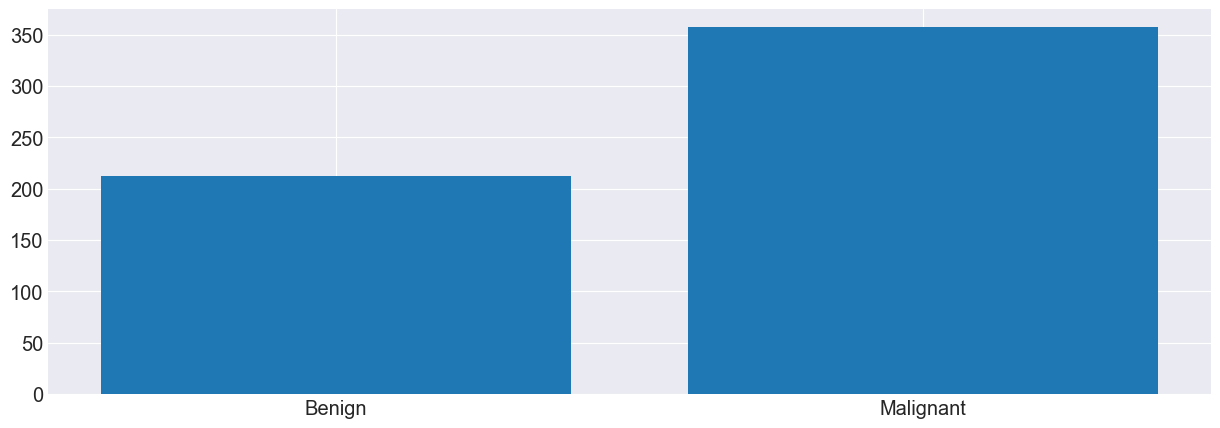

In [9]:
class_names = ['Malignant','Benign']
fig, ax = plt.subplots()
ax.bar(df.target.value_counts().index, df.target.value_counts());
ax.set_xticks(df.target.value_counts().index)
ax.set_xticklabels(class_names);

In [10]:
features_df = df.drop('target',axis = 1)
labels_df = df.target
print('Shape of X = ', features_df.shape)
print('Shape of y = ', labels_df.shape)

Shape of X =  (569, 30)
Shape of y =  (569,)


In [11]:
X_train, X_test, y_train, y_test =train_test_split(features_df,labels_df, test_size = TEST_SIZE, random_state = RANDOM_STATE, stratify = labels_df)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (426, 30)
Shape of y_train =  (426,)
Shape of X_test =  (143, 30)
Shape of y_test =  (143,)


In [12]:
# add a column with totals
X_train['total'] = X_train.astype(np.int16).sum(axis = 1)
# add the target column
X_train['target'] = y_train
# sort in ascending order
X_train.sort_values('total', inplace = True)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,...,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,...,1,1,12,0
2,0,1,0,1,...,0,1,13,0
1,0,1,0,0,...,1,1,13,0
5,0,0,0,0,...,1,1,15,0
6,0,0,0,1,...,1,1,15,0


In [13]:
# add a column with totals
X_test['total'] = X_test.astype(np.int16).sum(axis = 1)
# add the target column
X_test['target'] = y_test
# sort in ascending order
X_test.sort_values('total', inplace = True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,...,worst symmetry,worst fractal dimension,total,target
4,0,1,0,0,...,1,1,14,0
3,0,0,0,1,...,1,1,14,0
7,0,1,0,1,...,0,1,15,0
12,0,1,0,0,...,1,1,16,0
10,0,0,0,1,...,0,1,16,0


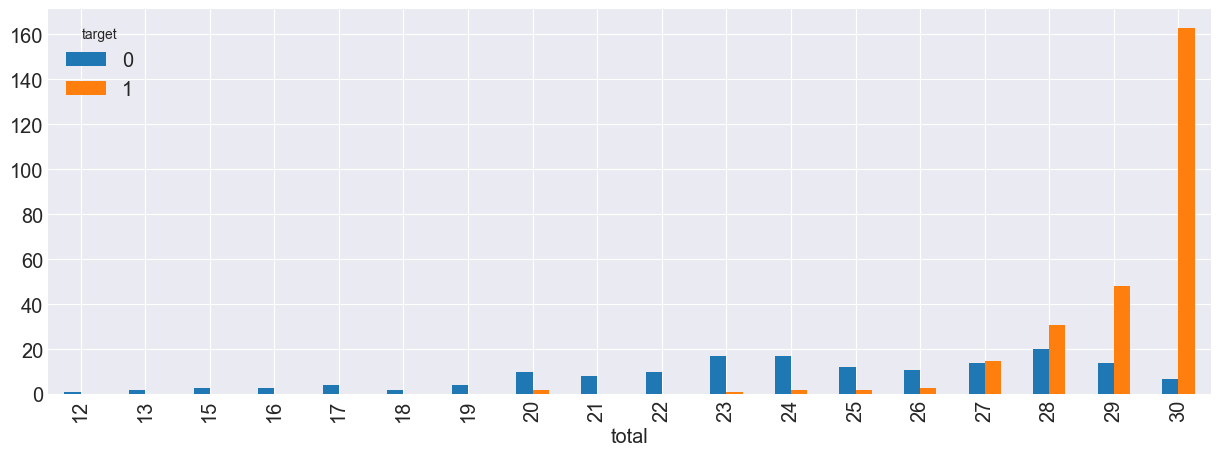

In [16]:
tmp_df = X_train.groupby(['total','target']).agg({'target':'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace = True)

tmp_df.pivot(index = 'total',columns = 'target', values = 'count').plot(kind = 'bar');

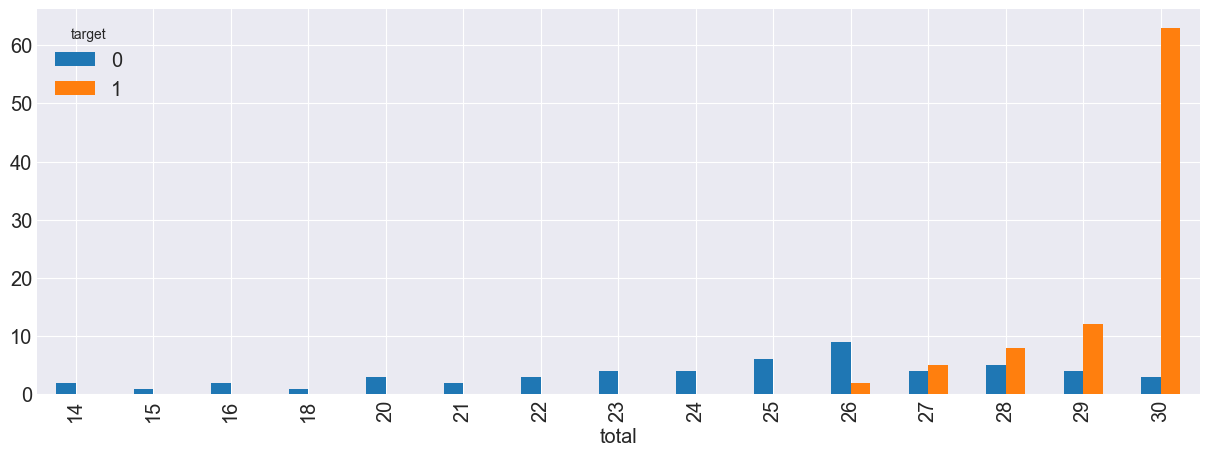

In [17]:
tmp_df = X_test.groupby(['total','target']).agg({'target':'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace = True)

tmp_df.pivot(index = 'total',columns = 'target', values = 'count').plot(kind = 'bar');

In [19]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
accuracy = {}

for b in np.arange(X_train.shape[1]):
    
    X_train['pred']=X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['pred'],X_train['target'])

In [20]:
accuracy

{0: 0.6267605633802817,
 1: 0.6267605633802817,
 2: 0.6267605633802817,
 3: 0.6267605633802817,
 4: 0.6267605633802817,
 5: 0.6267605633802817,
 6: 0.6267605633802817,
 7: 0.6267605633802817,
 8: 0.6267605633802817,
 9: 0.6267605633802817,
 10: 0.6267605633802817,
 11: 0.6267605633802817,
 12: 0.6267605633802817,
 13: 0.6291079812206573,
 14: 0.6338028169014085,
 15: 0.6338028169014085,
 16: 0.6408450704225352,
 17: 0.647887323943662,
 18: 0.6572769953051644,
 19: 0.6619718309859155,
 20: 0.6713615023474179,
 21: 0.6901408450704225,
 22: 0.7089201877934272,
 23: 0.7323943661971831,
 24: 0.7699530516431925,
 25: 0.8051643192488263,
 26: 0.8286384976525821,
 27: 0.8474178403755869,
 28: 0.8450704225352113,
 29: 0.8192488262910798,
 30: 0.7394366197183099,
 31: 0.3732394366197183,
 32: 0.3732394366197183}

In [23]:
best_b = max(accuracy, key = accuracy.get)

print('Highest accuracy was {1:7.3f} at threshold of {0:4d}'.format(best_b,accuracy[best_b]))

Highest accuracy was   0.847 at threshold of   27


In [24]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_test = accuracy_score(X_test['pred'], X_test['target'])
print('Test accuracy was{0:6.3f}'.format(accuracy_test))

Test accuracy was 0.874
